# The Data Science Pipeline: COVID-19 Case Tracking
Philip Tian, Jonathan Lin, David Ahmed

States-hitorical/US-historical from COVID Tracking Project<br>
CasesDeathsCounty/CountyConfirmedCases from Johns Hopkins<br>
https://www.cnn.com/2020/03/23/us/coronavirus-which-states-stay-at-home-order-trnd/index.html : when each state started stay-at-home

## Introduction

We will introduce the data science pipeline by analyzing data from the (currently ongoing) COVID-19 pandemic in the United States. COVID-19, also known as the coronavirus, or more specifically the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) is a disease that first appeared in the continental United States in early February and March. A comprehensive list of known and documented symptoms can be found [here](https://www.mayoclinic.org/diseases-conditions/coronavirus/symptoms-causes/syc-20479963). As of May 15, 2020, there are around [4.5 million](https://www.worldometers.info/coronavirus/) individuals infected with the virus, which is why many experts in the media and academia are calling this crisis a *pandemic*. 

The COVID-19 crisis has caused many temporary economic and social changes. For example, most states in the United States have issued [stay-at-home](https://www.bizjournals.com/baltimore/news/2020/03/30/gov-hogan-issues-stay-at-home-order-for-maryland.html) orders, where guidelines are issued on when and why one can leave home for certain reasons. These issues mean that normal work activities have stopped and countries have been struggling with issues like sudden drops in economic productivity (documented in news stories like [this one](https://www.bizjournals.com/baltimore/news/2020/03/30/gov-hogan-issues-stay-at-home-order-for-maryland.html) or [this one](https://www.cnbc.com/2020/05/15/bond-markets-latest-us-treasury-yields-on-may-15.html)). These economic issues directly caused by the virus have big impacts on the well-being of people all across the world, as [unemployment grows in several countries worldwide](https://www.cnbc.com/2020/05/15/unemployment-rises-in-china-as-coronavirus-shock-to-economy-persists.html), which is a direct consequence of the effects that the pandemic and governmental policies like stay-at-home and the closure of "non-essential businesses" have on the economy and people's income.

Given this balance between maintaining local or national economic health and preventing the spread of a dangerous disease, policymakers are faced with certain questions about the current state of affairs.
- How long should we maintain a stay-at-home order nationally/locally?
- Are other states/countries handling the situation "better"?  What are they doing differently?
- What does "better" even mean? Can we quantify these things when we are making policy decisions?
- How will cases grow from today? Can our current infrastructure (hospitals) handle this growth?

Faced with a variety of policy decisions that might literally cost lives, policy makers are walking on tightropes, and in this day and age of information it is especially important that the decision which is finally made is close to optimal. But how does one know whether or not a decision is optimal? Such a question can be answered using the techniques of data science.

### The Importance of Data Science During the COVID-19 Crisis

As the total number of COVID-19 cases increases in the USA and worldwide, it seems almost too easy for the mainstream media to capitalize on all the news cases to churn out new news stories. An increase in cases (perhaps coupled with some official or expert statement) is a news story waiting to happen. For example, [here](https://thehill.com/policy/healthcare/497013-public-health-expert-expects-increase-in-cases-in-next-10-days-in-states), [here](https://www.businessinsider.com/coronavirus-covid-19-cases-united-states-to-increase-shouldnt-panic-2020-3), and [here](https://www.news4jax.com/news/georgia/2020/04/17/georgia-cases-increase-556-overnight-top-17000-in-state/) are all news stories which were directly obtained by internet searching the phrase "increase in cases". With this influx of information, there are certain questions we should ask.
- Can we trust that the data that is being reported is accurate and correct?
- What exactly does 1000 (or 2000, or 500) cases daily mean in the context of a certain state/country/county?
- To what extent can we predict how the crisis (especially in terms of the number of cases) evolves over time?
- Is it possible to make policy or economic decisions based on such analysis, and should we make these decisions?

It is precisely the field of data science and its techniques and methods which allow us to conduct an accurate analysis of the data in order to produce more accurate answers to the questions above. By extracting, manipulating, and analyzing sets of data, we ensure that policymakers are much more informed about the status of the crisis locally and nationally much better than just day by day information and playing it by ear, so to speak. Gathering such information is critical, especially in our time when reliable information seems hard to find. 

In order to even start considering questions like those posed above, we must consider many of the aspects of the data science pipeline, which we have listed below.
1. Data Collection: data which is relevant to the project is found and collected.
2. Data Manipulation and Cleaning: Data is manipulated into a format which is suitable for analysis.
3. Initial Data Visualization (or exploratory data analysis): numerical data can be graphed to spot trends.
4. Modeling and Prediction: One can use various methods to do predictions on future data or general population.

<span style="color:red">(to be changed later as project evolves)</span>  
In our project, we will attempt to illustrate the data science pipeline with respect to the COVID-19 crisis. We will illustrate (with working code) the basic aspects of this pipeline as described above, starting from the beginning. First we will discuss the data and where we got it from, as well as the background and assessment of accuracy. Then, we will manipulate and modify the data for our purposes. Finally, we will use the data we obtained to make future predictions.

## Data Collection

For this project, we would like to collect data about total cases in the United States more closely restricted to the local level, such as states and counties. We've obtained data from the following sources, described below.

### The COVID Tracking Project

The COVID Tracking Project is a collective volunteer effort to document data about the crisis day by day. Their data collection claims to be comprehensive, with data from every state and most US Territories. Their data, as one of only comprehensive sources of data on cases in the US, is being used by many news outlets and academic experts. 

We will be using their data on the day by day number of cases in states and in the US. In the code below, this data is encompassed in the csv files `Data/States-historical.csv` and `Data/US-historical`, the former of which contains the data of the states and the latter of which contains overall US data. These spreadsheets give us the data we need for cases over time. The data is updated daily and can be found [here in this spreadsheet](https://docs.google.com/spreadsheets/u/2/d/e/2PACX-1vRwAqp96T9sYYq2-i7Tj0pvTf6XVHjDSMIKBdZHXiCGGdNC0ypEU9NbngS8mxea55JuCFuua1MUeOj5/pubhtml#).

### COVID-19 Data from JHU

Johns Hopkins University has a nice GUI which displays the current case data from around the world. It can be found [here](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6). It is a very visually striking application and readers are encouraged to go and play around with it. But where does this application pull data from? It pulls the data from a [github repository](https://github.com/CSSEGISandData/COVID-19) which is maintained by JHU for the purpose of keeping the application up to date. The data itself is more specific than that of the COVID Tracking project, in that it tracks cases and deaths by *county*, which is much more specific than state-wide. For example, in [Maryland](https://coronavirus.maryland.gov/), one might notice that the majority of cases arise in Montgomery County and Prince George's County, with less overall cases in neighboring counties (though Baltimore County does not trail too far behind). The data we've obtained from JHU is packaged into the files `Data/CasesDeathsCounty.csv` and `Data/CountyConfirmedCases.csv`.

### Date of Stay-at-Home Information

We can find the date that each state established a stay-at-home order through this [CNN Article](https://www.cnn.com/2020/03/23/us/coronavirus-which-states-stay-at-home-order-trnd/index.html), which gives detailed information on when all the US States established this order.

#### Limitations of the data gathered

Though as clearly highlighted above, there is lots of data regarding overall cases both nationally and locally regarding the total cases over time of COVID-19, one must at least be aware of the limitations that such convenient data offers us.

The primary concern when working with this data is accuracy. If a policymaker were to consider using such data and its trends to make important decisions relevant to the crisis, then the first question they ask should be
- Is this data reliable? Can I trust that the data values are accurately measured?
This concern about accuracy is very important when considering stay-at-home orders, shutdowns, and other impactful decisions.

The main limitation with large datasets which measure data from lots of locations, such as the data from the COVID Tracking project and the JHU dataset is that you need lots and lots of sources in order to measure accuracy of the data. With COVID, it is at least one source for each state and territory. For JHU, it is at least one source for each county. This is seemingly even worse, as a lot more can go wrong.

##### Concerns about the COVID Tracker Project Data

The COVID-19 Tracker Project Dataset pulls data from the relevant state and territory government health services. This means that the reliability of this data starts and ends with the accuracy of state government reporting. It is a difficult job to figure out how each state is measuring its data and whether or not it is accurate.

##### Concerns about the JHU Dataset

As of May 16, the github page for the JHU dataset has over [1300 reported issues](https://github.com/CSSEGISandData/COVID-19/issues). Some of these issues are [complete non-issues](https://github.com/CSSEGISandData/COVID-19/issues/2532). But some of these issues report supposedly serious problems with the data, for example [this one](https://github.com/CSSEGISandData/COVID-19/issues/2519) which is claiming that the applet is not reporting the case number for the country of Nepal correctly. A lot of the issues with the data are encoding related, having to do with state or county codes. Hopefully these will not be too much of an issue with respect to this project.

---

For the purposes of our project, we need not really concern ourselves with the reliability of the data collection. It is not our job, and besides, we don't have the power to confirm to ourselves. However, if we were in a position of more power, with the influence to affect policy decisions, then weighing these issues is something that we absolutely have to do. Hopefully we have made the point that in many cases **the hardest part of the data science pipeline is verifying that the data you get to be analyzed is completely accurate to the fullest extent possible**. But for the purposes of continuing our project we will assume that it is accurate.

In [4]:
import pandas as pd
from plotnine import *
import numpy as np

data = pd.read_csv("Data/States-historical.csv")

data = data[['state','date','positive','negative','pending','death','positiveIncrease','negativeIncrease','hospitalizedCurrently']]
data['date'] = pd.to_datetime(data['date'],format = '%Y%m%d')
data = data.query('date > "2020-03-01"')
#cases = data.groupby(['state','date']).agg({'positive': 'sum'}).reset_index().sort_values('state')
#print(data.to_string())

In [5]:
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME',
          'MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA',
          'RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY','DC','AS','GU','MP','PR','VI']

states_df = list()
for s in states:
    df = data.query('state == @s').copy()
    ratio = list()
    for i, row in df.iterrows():
        if ((row['positive'] + row['negative']) != 0):
            if np.isnan(row['pending']):
                ratio.append(row['positive']/(row['positive'] + row['negative']))
            else:
                ratio.append(row['positive']/(row['positive'] + row['negative'] + row['pending']))
        else:
            ratio.append(0)
    df['positiveRatio'] = ratio
    states_df.append(df)
#print(states_df)

/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 15 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable 

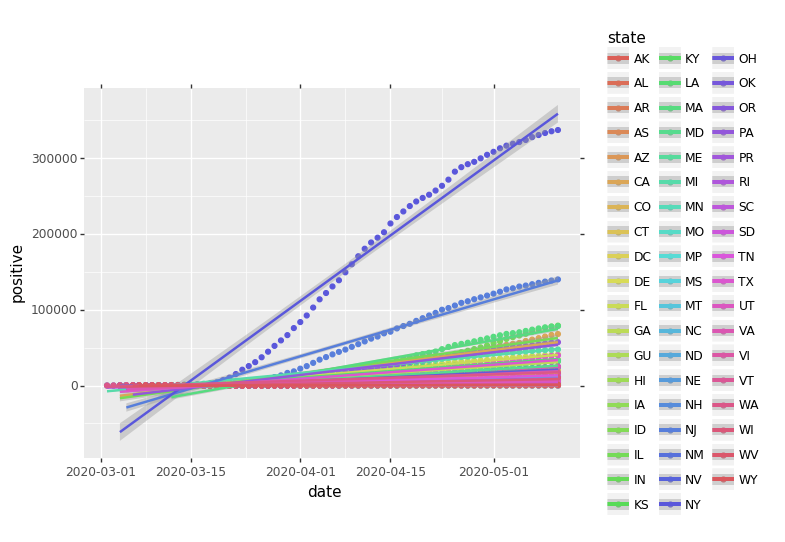

<ggplot: (308536537)>

In [6]:
(ggplot(data, aes(x='date', y='positive', color='state'))
         + geom_point()
         + geom_smooth(method='lm'))

/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable i

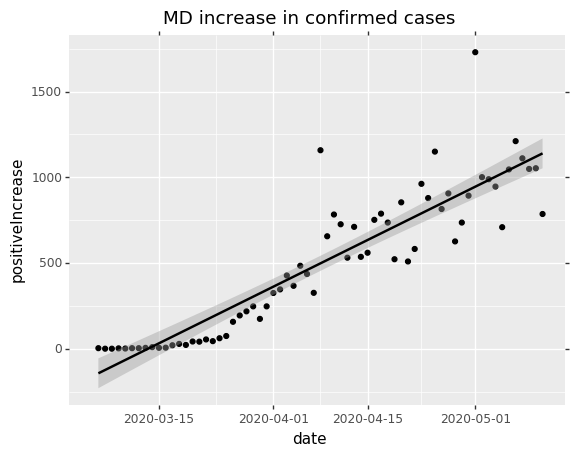

<ggplot: (308919237)>

In [7]:
(ggplot(states_df[19],aes(y='positiveIncrease',x='date'))
    + geom_point() + geom_smooth(method='lm')
    + ggtitle(states_df[19].iloc[0]['state']+" increase in confirmed cases"))

/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


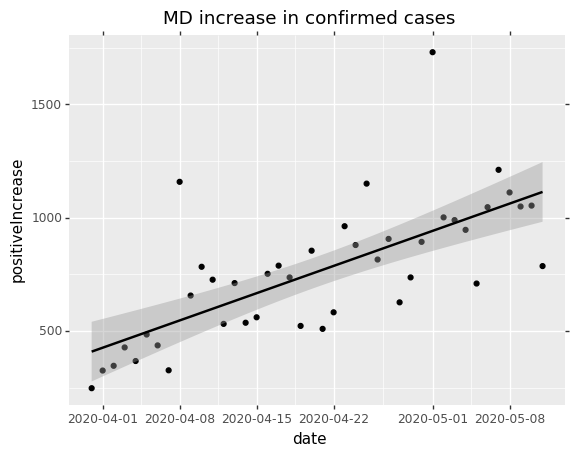

<ggplot: (279057321)>

In [8]:
temp_df = states_df[19].query('date > "2020-03-30"')
(ggplot(temp_df,aes(y='positiveIncrease',x='date'))
    + geom_point() + geom_smooth(method='lm')
    + ggtitle(states_df[19].iloc[0]['state']+" increase in confirmed cases"))

In [9]:
#TODO: make linear regression for all 56 states + US overall
#TODO: make similar lists/graphs for deaths, for comparing ratio of positve:negative/total, and for hospitilizations

/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


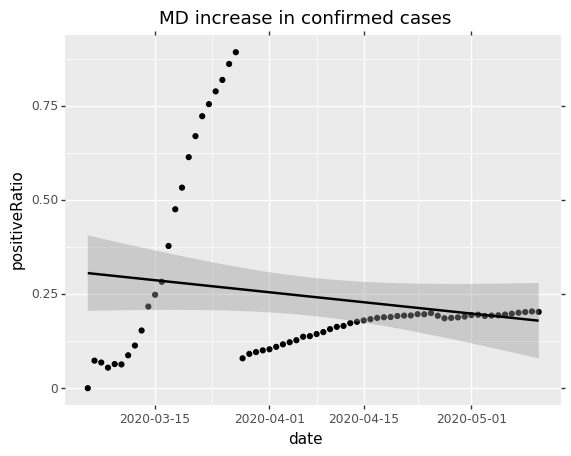

<ggplot: (309076049)>

In [10]:
#print(states_df[19].to_string())
(ggplot(states_df[19],aes(y='positiveRatio',x='date'))
    + geom_point() + geom_smooth(method='lm')
    + ggtitle(states_df[19].iloc[0]['state']+" increase in confirmed cases"))

/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


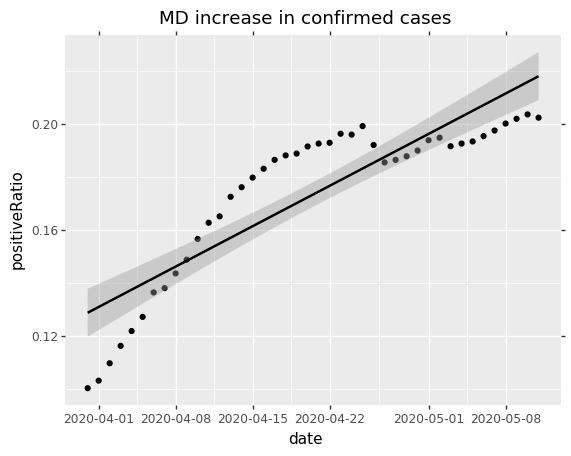

<ggplot: (312562837)>

In [40]:
(ggplot(temp_df,aes(y='positiveRatio',x='date'))
    + geom_point() + geom_smooth(method='lm')
    + ggtitle(states_df[19].iloc[0]['state']+" increase in confirmed cases"))

## Data Manipulation


In [53]:
counties = set(["Allegany", "Anne Arundel", "Baltimore", "Calvert", 
                "Caroline", "Carroll", "Cecil", "Charles", "Dorchester",
               "Frederick", "Garrett", "Harford", "Howard", "Kent",
               "Montgomery", "Prince George's", "Queen Anne's",
               "St. Mary's", "Somerset", "Talbot", "Washington",
               "Wicomico", "Worcester", "Baltimore City"])

county_deaths = pd.read_csv("Data/CasesDeathsCounty.csv");
county_confirmed = pd.read_csv("Data/CountyConfirmedCases.csv")

maryland_deaths = county_deaths.loc[county_deaths["location_name"]
                        .isin(counties)].loc[county_deaths["date"]
                        .between(("04/1/2020"), ("05/12/2018"))].reset_index(drop=True)
maryland_confirmed = county_confirmed.loc[county_confirmed["county_name"].isin(counties)].reset_index(drop=True)

maryland_deaths.head(10)

,uid,location_type,fips_code,location_name,state,date,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000
0,84001101,county,1101.0,Montgomery,Alabama,04/10/2020,226941.0,92,40.54,4,1.76,4.0,2.0,1.76,0.88
1,84001101,county,1101.0,Montgomery,Alabama,04/11/2020,226941.0,102,44.95,4,1.76,10.0,0.0,4.41,0.00
2,84001101,county,1101.0,Montgomery,Alabama,04/12/2020,226941.0,119,52.44,4,1.76,17.0,0.0,7.49,0.00
3,84001101,county,1101.0,Montgomery,Alabama,04/13/2020,226941.0,135,59.49,5,2.20,16.0,1.0,7.05,0.44
4,84001101,county,1101.0,Montgomery,Alabama,04/14/2020,226941.0,161,70.94,5,2.20,26.0,0.0,11.46,0.00
5,84001101,county,1101.0,Montgomery,Alabama,04/15/2020,226941.0,174,76.67,5,2.20,13.0,0.0,5.73,0.00
6,84001101,county,1101.0,Montgomery,Alabama,04/16/2020,226941.0,197,86.81,5,2.20,23.0,0.0,10.13,0.00
7,84001101,county,1101.0,Montgomery,Alabama,04/17/2020,226941.0,207,91.21,5,2.20,10.0,0.0,4.41,0.00
8,84001101,county,1101.0,Montgomery,Alabama,04/18/2020,226941.0,215,94.74,5,2.20,8.0,0.0,3.53,0.00
9,84001101,county,1101.0,Montgomery,Alabama,04/19/2020,226941.0,226,99.59,3,1.32,11.0,-2.0,4.85,-0.88


In [39]:
maryland_confirmed.head(10)

,last_update,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
0,2020-05-12 21:32:28,Alabama,Montgomery,"Montgomery, Alabama, US",1101.0,32.220683,-86.209693,Medium metro,226941.0,663,292.15,17,7.49
1,2020-05-12 21:32:28,Alabama,Washington,"Washington, Alabama, US",1129.0,31.409279,-88.206899,Non-core,16643.0,55,330.47,3,18.03
2,2020-05-12 21:32:28,Arkansas,Carroll,"Carroll, Arkansas, US",5015.0,36.340386,-93.542703,Non-core,27887.0,6,21.52,0,0.00
3,2020-05-12 21:32:28,Arkansas,Howard,"Howard, Arkansas, US",5061.0,34.090074,-93.993487,Non-core,13389.0,14,104.56,0,0.00
4,2020-05-12 21:32:28,Arkansas,Montgomery,"Montgomery, Arkansas, US",5097.0,34.537049,-93.658245,Non-core,8993.0,1,11.12,0,0.00
5,2020-05-12 21:32:28,Arkansas,Washington,"Washington, Arkansas, US",5143.0,35.976844,-94.218007,Medium metro,228529.0,110,48.13,3,1.31
6,2020-05-12 21:32:28,Colorado,Washington,"Washington, Colorado, US",8121.0,39.970155,-103.202587,Non-core,4840.0,9,185.95,0,0.00
7,2020-05-12 21:32:28,Delaware,Kent,"Kent, Delaware, US",10001.0,39.086466,-75.568849,Small metro,174822.0,1060,606.33,43,24.60
8,2020-05-12 21:32:28,Florida,Washington,"Washington, Florida, US",12133.0,30.613593,-85.660025,Non-core,24566.0,12,48.85,0,0.00
9,2020-05-12 21:32:28,Georgia,Carroll,"Carroll, Georgia, US",13045.0,33.581382,-85.079767,Large fringe metro,116022.0,397,342.18,19,16.38


## Exploratory Data Analysis

/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/Volumes/DavidSSD/classes/spring_2020/320/env/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:80: UserWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  warn("geom_path: Each group consist of only one "


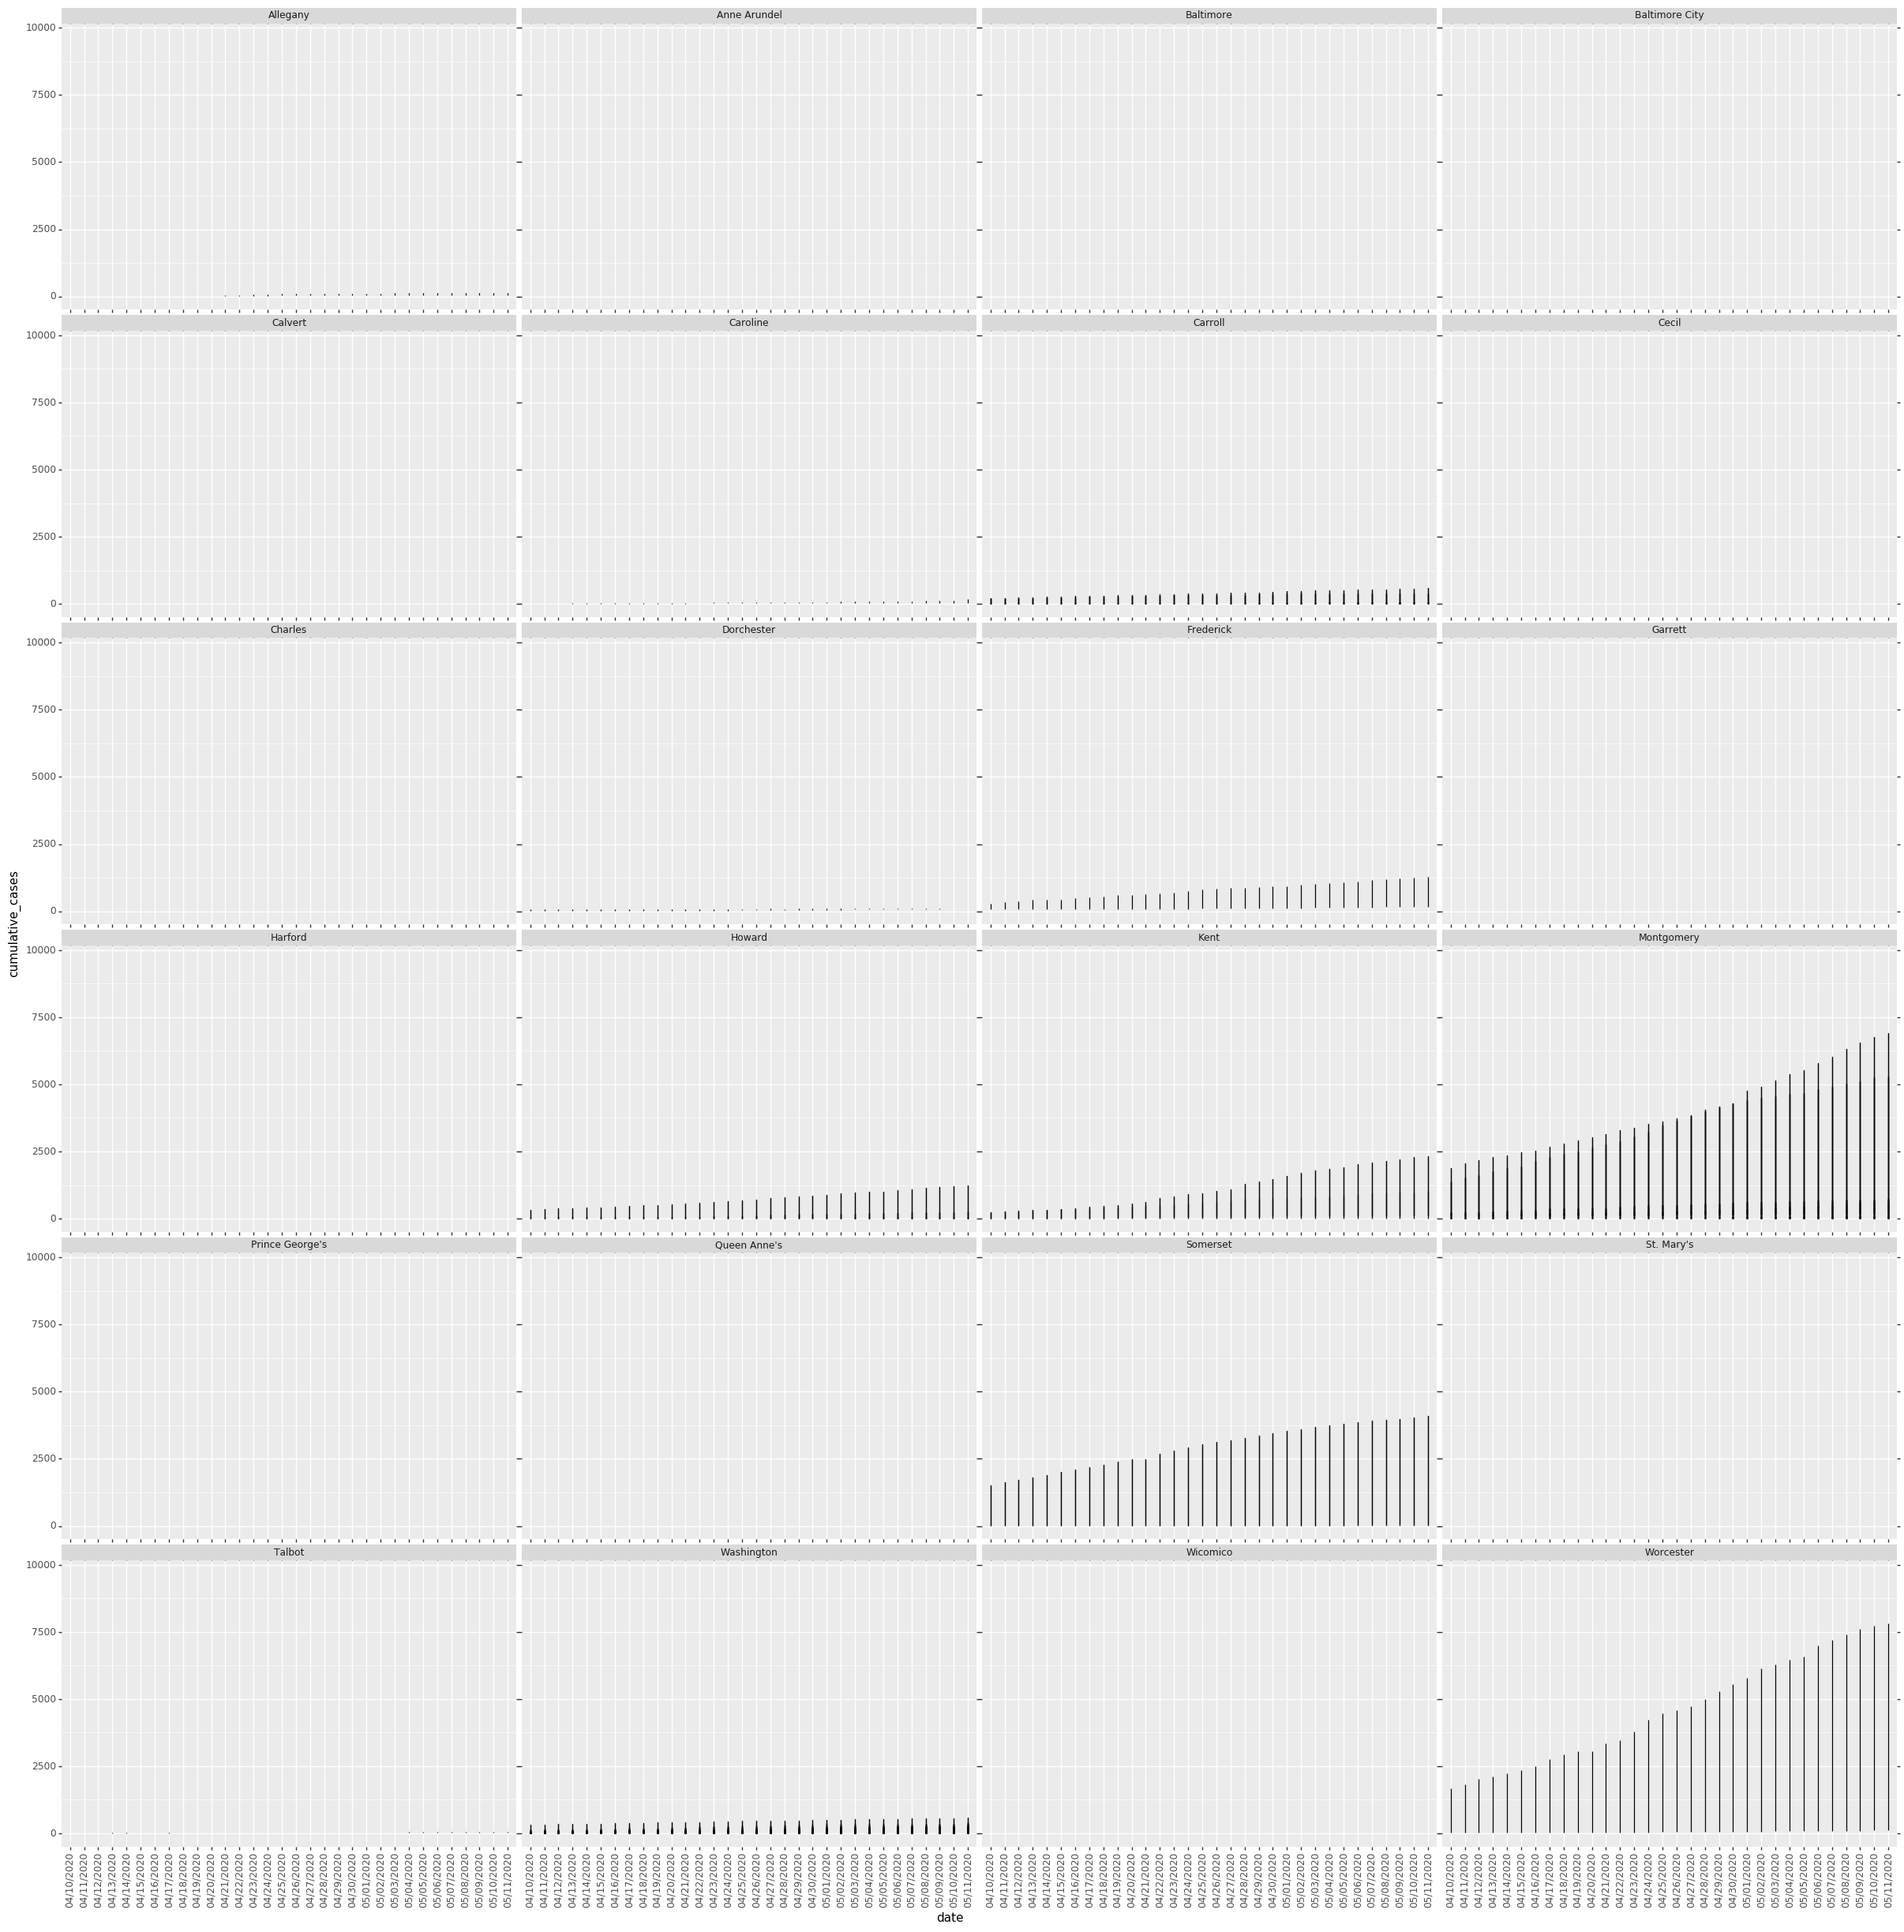

<ggplot: (332951253)>

In [64]:
(ggplot(maryland_deaths, aes(x="date", y="cumulative_cases"))
    + geom_line()
    + facet_wrap('~location_name', ncol=4)
    + theme(axis_text_x = element_text(angle=90), figure_size=(30,30)))
